In [20]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

from sampler import sample_from_logreg

from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics.pairwise import polynomial_kernel
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

from cv_svm import SVM_smooth
from kernel_svm import SVM_smooth_kernel

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
#X, y = load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=250, n_features=50)
X, _, y = sample_from_logreg(n=100, p=5, seed=120)
n = X.shape[0]
p = X.shape[1]
y[np.where(y == 0)] = -1

In [3]:
X_scaled = StandardScaler().fit_transform(X)
#X_scaled = X
print(X_scaled.shape)

(100, 5)


In [4]:
clf = SVC(kernel='rbf')
clf.fit(X_scaled, y)
coef = clf.dual_coef_

In [5]:
y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.81

In [6]:
sigma = 1e-10
lbd = 0.05
length_scale = 1000
degree = 6

In [7]:
# calculate maximum bound
from sklearn.metrics import pairwise_distances
m_max = np.min(pairwise_distances(X))**2
print(m_max)
m_max = 0
gram = RBF(length_scale)(X, X)
gram_inv = np.linalg.inv(gram)

C = np.linalg.norm(gram.T @ gram)/(n-1)
print(np.linalg.norm(gram_inv) * np.linalg.norm(gram))

# what lambda do we have to pick?
b = 1e20
big_term = 1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)

bound = np.linalg.norm(gram_inv) * (lbd * np.linalg.norm(gram) + C * big_term)/lbd
print(f"Bound is {bound}")

lbd_pick = np.linalg.norm(gram_inv) * C * big_term/(b - np.linalg.norm(gram_inv) * np.linalg.norm(gram))

lbd_pick

0.0
1.7531144480924654e+19
Bound is 1.9461248304262342e+20


0.10736255368594222

In [8]:
clf = SVM_smooth_kernel(sigma=sigma, lbd=lbd, kernel=RBF(length_scale))
clf.fit(X_scaled, y, n_iter=5000, eta=0.5/n, approx_cv=True,
        cv=True, log_iacv=True, save_err_approx=True, save_err_cv=True, save_cond_num=True)

y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

| IACV: 0.00030148 | baseline: 0.00058094
| IACV: 0.00059535 | baseline: 0.00114743
| IACV: 0.00088180 | baseline: 0.00169983
| IACV: 0.00116103 | baseline: 0.00223848
| IACV: 0.00143321 | baseline: 0.00276372
| IACV: 0.00169853 | baseline: 0.00327590
| IACV: 0.00195715 | baseline: 0.00377534
| IACV: 0.00220926 | baseline: 0.00426235
| IACV: 0.00245500 | baseline: 0.00473724
| IACV: 0.00269456 | baseline: 0.00520031
| IACV: 0.00292807 | baseline: 0.00565187
| IACV: 0.00315571 | baseline: 0.00609219
| IACV: 0.00337760 | baseline: 0.00652156
| IACV: 0.00359391 | baseline: 0.00694024
| IACV: 0.00380477 | baseline: 0.00734851
| IACV: 0.00401032 | baseline: 0.00774662
| IACV: 0.00421069 | baseline: 0.00813483
| IACV: 0.00440602 | baseline: 0.00851338
| IACV: 0.00459644 | baseline: 0.00888252
| IACV: 0.00478206 | baseline: 0.00924247
| IACV: 0.00496301 | baseline: 0.00959346
| IACV: 0.00513941 | baseline: 0.00993573
| IACV: 0.00531136 | baseline: 0.01026948
| IACV: 0.00547900 | baseline: 0.0

0.53

| IACV: 0.01786192 | baseline: 0.16487746
| IACV: 0.01786730 | baseline: 0.16492725
| IACV: 0.01787269 | baseline: 0.16497704
| IACV: 0.01787806 | baseline: 0.16502683
| IACV: 0.01788345 | baseline: 0.16507662
| IACV: 0.01788883 | baseline: 0.16512641
| IACV: 0.01789421 | baseline: 0.16517620
| IACV: 0.01789958 | baseline: 0.16522599
| IACV: 0.01790498 | baseline: 0.16527578
| IACV: 0.01791034 | baseline: 0.16532557
| IACV: 0.01791574 | baseline: 0.16537536
| IACV: 0.01792110 | baseline: 0.16542515
| IACV: 0.01792649 | baseline: 0.16547494
| IACV: 0.01793187 | baseline: 0.16552473
| IACV: 0.01793724 | baseline: 0.16557452
| IACV: 0.01794262 | baseline: 0.16562431
| IACV: 0.01794800 | baseline: 0.16567410
| IACV: 0.01795338 | baseline: 0.16572389
| IACV: 0.01795875 | baseline: 0.16577368
| IACV: 0.01796415 | baseline: 0.16582347
| IACV: 0.01796951 | baseline: 0.16587326
| IACV: 0.01797491 | baseline: 0.16592305
| IACV: 0.01798028 | baseline: 0.16597284
| IACV: 0.01798567 | baseline: 0.1

| IACV: 0.01898631 | baseline: 0.17528335
| IACV: 0.01899169 | baseline: 0.17533314
| IACV: 0.01899709 | baseline: 0.17538293
| IACV: 0.01900245 | baseline: 0.17543271
| IACV: 0.01900783 | baseline: 0.17548250
| IACV: 0.01901322 | baseline: 0.17553229
| IACV: 0.01901858 | baseline: 0.17558208
| IACV: 0.01902396 | baseline: 0.17563187
| IACV: 0.01902935 | baseline: 0.17568165
| IACV: 0.01903472 | baseline: 0.17573144
| IACV: 0.01904009 | baseline: 0.17578123
| IACV: 0.01904547 | baseline: 0.17583101
| IACV: 0.01905085 | baseline: 0.17588080
| IACV: 0.01905623 | baseline: 0.17593059
| IACV: 0.01906160 | baseline: 0.17598038
| IACV: 0.01906698 | baseline: 0.17603016
| IACV: 0.01907237 | baseline: 0.17607995
| IACV: 0.01907773 | baseline: 0.17612974
| IACV: 0.01908311 | baseline: 0.17617953
| IACV: 0.01908850 | baseline: 0.17622931
| IACV: 0.01909387 | baseline: 0.17627910
| IACV: 0.01909925 | baseline: 0.17632889
| IACV: 0.01910465 | baseline: 0.17637868
| IACV: 0.01911000 | baseline: 0.1

| IACV: 0.02006194 | baseline: 0.18524061
| IACV: 0.02006731 | baseline: 0.18529039
| IACV: 0.02007269 | baseline: 0.18534018
| IACV: 0.02007808 | baseline: 0.18538996
| IACV: 0.02008346 | baseline: 0.18543975
| IACV: 0.02008885 | baseline: 0.18548953
| IACV: 0.02009424 | baseline: 0.18553932
| IACV: 0.02009960 | baseline: 0.18558910
| IACV: 0.02010498 | baseline: 0.18563889
| IACV: 0.02011036 | baseline: 0.18568867
| IACV: 0.02011575 | baseline: 0.18573846
| IACV: 0.02012113 | baseline: 0.18578824
| IACV: 0.02012652 | baseline: 0.18583803
| IACV: 0.02013187 | baseline: 0.18588781
| IACV: 0.02013726 | baseline: 0.18593760
| IACV: 0.02014264 | baseline: 0.18598738
| IACV: 0.02014803 | baseline: 0.18603717
| IACV: 0.02015341 | baseline: 0.18608695
| IACV: 0.02015880 | baseline: 0.18613674
| IACV: 0.02016416 | baseline: 0.18618652
| IACV: 0.02016954 | baseline: 0.18623631
| IACV: 0.02017492 | baseline: 0.18628609
| IACV: 0.02018031 | baseline: 0.18633588
| IACV: 0.02018570 | baseline: 0.1

| IACV: 0.02117193 | baseline: 0.19549604
| IACV: 0.02117733 | baseline: 0.19554582
| IACV: 0.02118272 | baseline: 0.19559560
| IACV: 0.02118812 | baseline: 0.19564539
| IACV: 0.02119351 | baseline: 0.19569517
| IACV: 0.02119891 | baseline: 0.19574495
| IACV: 0.02120430 | baseline: 0.19579473
| IACV: 0.02120971 | baseline: 0.19584452
| IACV: 0.02121509 | baseline: 0.19589430
| IACV: 0.02122049 | baseline: 0.19594408
| IACV: 0.02122589 | baseline: 0.19599386
| IACV: 0.02123128 | baseline: 0.19604364
| IACV: 0.02123668 | baseline: 0.19609343
| IACV: 0.02124208 | baseline: 0.19614321
| IACV: 0.02124747 | baseline: 0.19619299
| IACV: 0.02125286 | baseline: 0.19624277
| IACV: 0.02125826 | baseline: 0.19629255
| IACV: 0.02126366 | baseline: 0.19634234
| IACV: 0.02126905 | baseline: 0.19639212
| IACV: 0.02127445 | baseline: 0.19644190
| IACV: 0.02127985 | baseline: 0.19649168
| IACV: 0.02128524 | baseline: 0.19654146
| IACV: 0.02129064 | baseline: 0.19659125
| IACV: 0.02129604 | baseline: 0.1

| IACV: 0.02232311 | baseline: 0.20609937
| IACV: 0.02232852 | baseline: 0.20614915
| IACV: 0.02233393 | baseline: 0.20619893
| IACV: 0.02233937 | baseline: 0.20624871
| IACV: 0.02234478 | baseline: 0.20629849
| IACV: 0.02235019 | baseline: 0.20634827
| IACV: 0.02235561 | baseline: 0.20639805
| IACV: 0.02236101 | baseline: 0.20644783
| IACV: 0.02236643 | baseline: 0.20649761
| IACV: 0.02237186 | baseline: 0.20654739
| IACV: 0.02237728 | baseline: 0.20659717
| IACV: 0.02238268 | baseline: 0.20664695
| IACV: 0.02238809 | baseline: 0.20669673
| IACV: 0.02239351 | baseline: 0.20674651
| IACV: 0.02239893 | baseline: 0.20679628
| IACV: 0.02240435 | baseline: 0.20684606
| IACV: 0.02240977 | baseline: 0.20689584
| IACV: 0.02241518 | baseline: 0.20694562
| IACV: 0.02242059 | baseline: 0.20699540
| IACV: 0.02242603 | baseline: 0.20704518
| IACV: 0.02243144 | baseline: 0.20709496
| IACV: 0.02243686 | baseline: 0.20714474
| IACV: 0.02244226 | baseline: 0.20719452
| IACV: 0.02244770 | baseline: 0.2

| IACV: 0.02348396 | baseline: 0.21675189
| IACV: 0.02348938 | baseline: 0.21680167
| IACV: 0.02349482 | baseline: 0.21685144
| IACV: 0.02350024 | baseline: 0.21690122
| IACV: 0.02350567 | baseline: 0.21695100
| IACV: 0.02351109 | baseline: 0.21700077
| IACV: 0.02351651 | baseline: 0.21705055
| IACV: 0.02352194 | baseline: 0.21710033
| IACV: 0.02352737 | baseline: 0.21715010
| IACV: 0.02353278 | baseline: 0.21719988
| IACV: 0.02353821 | baseline: 0.21724966
| IACV: 0.02354363 | baseline: 0.21729943
| IACV: 0.02354906 | baseline: 0.21734921
| IACV: 0.02355448 | baseline: 0.21739899
| IACV: 0.02355990 | baseline: 0.21744876
| IACV: 0.02356533 | baseline: 0.21749854
| IACV: 0.02357074 | baseline: 0.21754832
| IACV: 0.02357618 | baseline: 0.21759809
| IACV: 0.02358160 | baseline: 0.21764787
| IACV: 0.02358702 | baseline: 0.21769765
| IACV: 0.02359244 | baseline: 0.21774742
| IACV: 0.02359786 | baseline: 0.21779720
| IACV: 0.02360324 | baseline: 0.21784698
| IACV: 0.02360863 | baseline: 0.2

| IACV: 0.02463066 | baseline: 0.22735404
| IACV: 0.02463604 | baseline: 0.22740381
| IACV: 0.02464142 | baseline: 0.22745358
| IACV: 0.02464679 | baseline: 0.22750336
| IACV: 0.02465218 | baseline: 0.22755313
| IACV: 0.02465756 | baseline: 0.22760291
| IACV: 0.02466295 | baseline: 0.22765268
| IACV: 0.02466833 | baseline: 0.22770245
| IACV: 0.02467370 | baseline: 0.22775223
| IACV: 0.02467910 | baseline: 0.22780200
| IACV: 0.02468447 | baseline: 0.22785178
| IACV: 0.02468986 | baseline: 0.22790155
| IACV: 0.02469523 | baseline: 0.22795132
| IACV: 0.02470061 | baseline: 0.22800110
| IACV: 0.02470600 | baseline: 0.22805087
| IACV: 0.02471138 | baseline: 0.22810064
| IACV: 0.02471676 | baseline: 0.22815042
| IACV: 0.02472214 | baseline: 0.22820019
| IACV: 0.02472753 | baseline: 0.22824997
| IACV: 0.02473291 | baseline: 0.22829974
| IACV: 0.02473828 | baseline: 0.22834951
| IACV: 0.02474367 | baseline: 0.22839929
| IACV: 0.02474904 | baseline: 0.22844906
| IACV: 0.02475443 | baseline: 0.2

| IACV: 0.02577129 | baseline: 0.23790582
| IACV: 0.02577669 | baseline: 0.23795559
| IACV: 0.02578207 | baseline: 0.23800536
| IACV: 0.02578747 | baseline: 0.23805513
| IACV: 0.02579283 | baseline: 0.23810491
| IACV: 0.02579823 | baseline: 0.23815468
| IACV: 0.02580360 | baseline: 0.23820445
| IACV: 0.02580899 | baseline: 0.23825422
| IACV: 0.02581435 | baseline: 0.23830399
| IACV: 0.02581974 | baseline: 0.23835376
| IACV: 0.02582512 | baseline: 0.23840353
| IACV: 0.02583051 | baseline: 0.23845330
| IACV: 0.02583587 | baseline: 0.23850307
| IACV: 0.02584127 | baseline: 0.23855284
| IACV: 0.02584665 | baseline: 0.23860262
| IACV: 0.02585204 | baseline: 0.23865239
| IACV: 0.02585741 | baseline: 0.23870216
| IACV: 0.02586280 | baseline: 0.23875193
| IACV: 0.02586818 | baseline: 0.23880170
| IACV: 0.02587357 | baseline: 0.23885147
| IACV: 0.02587893 | baseline: 0.23890124
| IACV: 0.02588432 | baseline: 0.23895101
| IACV: 0.02588969 | baseline: 0.23900078
| IACV: 0.02589508 | baseline: 0.2

| IACV: 0.02687927 | baseline: 0.24815841
| IACV: 0.02688462 | baseline: 0.24820818
| IACV: 0.02688998 | baseline: 0.24825794
| IACV: 0.02689533 | baseline: 0.24830771
| IACV: 0.02690067 | baseline: 0.24835748
| IACV: 0.02690603 | baseline: 0.24840725
| IACV: 0.02691136 | baseline: 0.24845702
| IACV: 0.02691671 | baseline: 0.24850679
| IACV: 0.02692206 | baseline: 0.24855655
| IACV: 0.02692741 | baseline: 0.24860632
| IACV: 0.02693276 | baseline: 0.24865609
| IACV: 0.02693812 | baseline: 0.24870586
| IACV: 0.02694346 | baseline: 0.24875563
| IACV: 0.02694882 | baseline: 0.24880540
| IACV: 0.02695416 | baseline: 0.24885516
| IACV: 0.02695952 | baseline: 0.24890493
| IACV: 0.02696487 | baseline: 0.24895470
| IACV: 0.02697023 | baseline: 0.24900447


1.0

In [9]:
coef = clf.u_/np.linalg.norm(clf.u_)
iacv_coef = normalize(clf.approx_cv_obj.iterates, axis=1)
true_coef = normalize(clf.true_cv_obj.iterates, axis=1)
print(np.mean(np.linalg.norm(iacv_coef - true_coef, 2, axis=1)))
print(np.mean(np.linalg.norm(coef - true_coef, 2, axis=1)))

0.10013108530659823
0.10012552889100823


In [10]:
print(np.std(clf.approx_cv_obj.iterates))
print(np.std(clf.true_cv_obj.iterates))

0.0020165883
0.001085067455029443


In [11]:
print(np.mean(clf.approx_cv_obj.iterates, axis=0))
print(np.mean(clf.true_cv_obj.iterates, axis=0))

[0.00994026 0.00994296 0.00993128 0.00995288 0.00993928 0.00993781
 0.00993191 0.00993338 0.00994858 0.00992764 0.00992274 0.0099319
 0.00993529 0.00993657 0.00995212 0.00992528 0.00992898 0.00993885
 0.00993053 0.00994515 0.00993942 0.00992675 0.0099396  0.0099368
 0.00994304 0.00994654 0.00993064 0.00993362 0.00995155 0.0099426
 0.00992962 0.00993393 0.00994311 0.00994103 0.00995233 0.00992704
 0.00994316 0.00993256 0.00994128 0.00992855 0.00994767 0.00993111
 0.00991878 0.00994249 0.00994229 0.00997036 0.00993741 0.00990698
 0.00994438 0.00993272 0.00995034 0.00993948 0.00994652 0.00993287
 0.00994193 0.00995658 0.00992822 0.00994174 0.00992947 0.00991923
 0.00992655 0.00993059 0.00994108 0.00994062 0.00995855 0.0099235
 0.00993032 0.00994302 0.0099303  0.00994114 0.0099304  0.00995819
 0.00993898 0.00992763 0.00994373 0.00993517 0.00994151 0.00992957
 0.0099369  0.00995238 0.00993168 0.00992787 0.0099276  0.00994059
 0.00993476 0.00992888 0.00993358 0.00992009 0.00992616 0.00991895

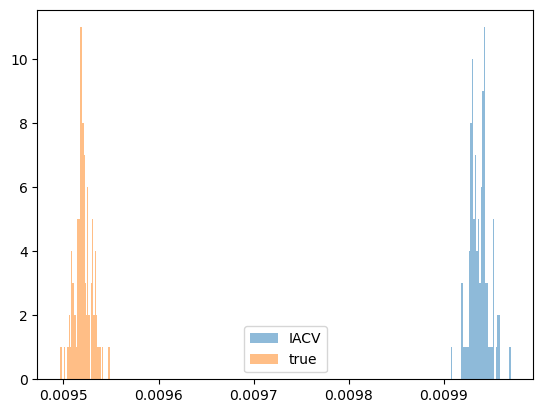

In [12]:
plt.hist(np.mean(clf.approx_cv_obj.iterates, axis=0), alpha=0.5, bins=40, label="IACV")
plt.hist(np.mean(clf.true_cv_obj.iterates, axis=0), alpha=0.5, bins=40, label="true")
plt.legend()

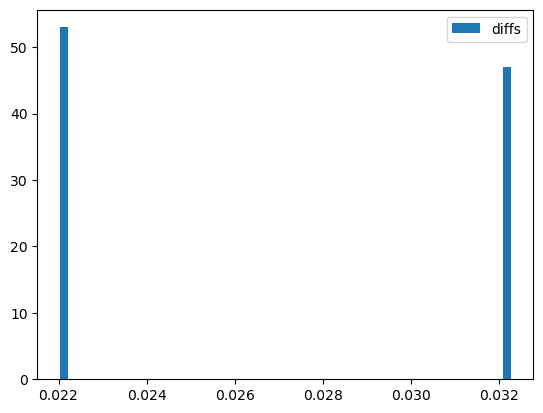

In [13]:
plt.hist(np.linalg.norm(clf.approx_cv_obj.iterates - clf.true_cv_obj.iterates, axis=1), bins=60, label="diffs")
plt.legend()

In [21]:
fig, ax = plt.subplots()
ax.plot(clf.err_approx_["IACV"], label="IACV", c='black')
#ax.plot(clf.err_approx_["NS"], label="NS", c='red', linestyle="--")
ax.plot(clf.err_approx_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err Approx (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svm_convergence_err_approx_fail.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_24763/979959194.py:13: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [22]:
fig, ax = plt.subplots()
ax.plot(clf.err_cv_["IACV"], label="IACV", c='black')
ax.plot(clf.err_cv_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err CV (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svm_convergence_err_cv_fail.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_24763/891606046.py:12: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [23]:
fig, ax = plt.subplots()
cond_nums = np.asarray(clf.approx_cv_obj.cond_nums)
ax.plot(np.mean(cond_nums, axis=1), label="Mean Cond no.", c='black')
ax.set_xlabel("Iterations")
ax.set_ylabel("Condition No")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svm_convergence_cond_no_fail.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_24763/2045760442.py:10: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [17]:
last_err_cv = np.asarray(last_err_cv)
last_err_approx = np.asarray(last_err_approx)

last_err_cv = np.nan_to_num(last_err_cv, nan=1e2)
last_err_approx = np.nan_to_num(last_err_approx, nan=1e2)

last_err_cv = np.clip(last_err_cv, 0, 1e2)
last_err_approx = np.clip(last_err_approx, 0, 1e2)

NameError: name 'last_err_cv' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.plot(sigmas, last_err_approx[:, 0], label="IACV", c='black')
ax.plot(sigmas, last_err_approx[:, 1], label="Baseline", c='green', linestyle="--")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Err Approx")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_sigma_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sigmas, last_err_cv[:, 0], label="IACV", c='black')
ax.plot(sigmas, last_err_cv[:, 1], label="Baseline", c='green', linestyle="--")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Err CV")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_sigma_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sigmas, cond_nums)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Condition Number")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_sigma_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
# test different lambda values
import time
#lambdas = np.linspace(0, 2.5, 12)
lambdas = np.linspace(0, 2.5, 4)
print(lambdas)
last_err_approx = []
last_err_cv = []
condition_nos = []
iacv_iterates = []
true_iterates = []

start = time.time()
for l in lambdas:
    #clf = SVM_smooth_kernel(sigma=0.25, lbd=l, kernel=RBF(2.5))
    #clf.fit(X_scaled, y, n_iter=1000, eta=0.5/n, approx_cv=True, cv=True,
    #        save_err_approx=True, save_err_cv=True, log_iacv=False, log_iter=False)
    print(f"running experiment for lambda = {l}")
    clf = SVM_smooth(sigma=1e-10, lbd=l)
    clf.fit(X_scaled, y, thresh=1e-7, n_iter=2000, eta=0.5/n, approx_cv=True, cv=True,
            save_err_approx=True, save_err_cv=True, save_cond_nums=True,
            log_iacv=False, log_iter=False, normalise=False, adjust_factor=True)
    y_pred = clf.predict(X_scaled)
    score = accuracy_score(y, y_pred)
    
    condition_nos.append(clf.approx_cv_obj.cond_nums)
    iacv_iterates.append(clf.approx_cv_obj.iterates)
    true_iterates.append(clf.true_cv_obj.iterates)

    #coef = clf.weights_/np.linalg.norm(clf.weights_)

    #print(clf.weights_)
    #print(f"\tlambda {l} | score {score} | grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))} | sklearn diff {np.mean(np.abs(coef- sk_coef))}")
    print(f"\tlambda {l} | score {score}")
    print(f"\tIACV: {clf.err_approx_['IACV'][-1]} | baseline: {clf.err_approx_['baseline'][-1]}" )
    last_err_approx.append([clf.err_approx_["IACV"][-1], clf.err_approx_["baseline"][-1]])
    last_err_cv.append([clf.err_cv_["IACV"][-1], clf.err_cv_["baseline"][-1]])

end = time.time()
print(end - start)

In [ ]:
last_err_approx = np.asarray(last_err_approx)
last_err_cv = np.asarray(last_err_cv)
condition_nos = np.asarray(condition_nos)
iacv_iterates = np.asarray(iacv_iterates)
true_iterates = np.asarray(true_iterates)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lambdas, last_err_approx[:, 0], label="IACV", c='black')
ax.plot(lambdas, last_err_approx[:, 1], label="Baseline", c='green', linestyle="--")
#ax.set_yscale('log')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Err Approx")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('kernel_svmtest_lambda_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lambdas, last_err_cv[:, 0], label="IACV", c='black')
ax.plot(lambdas, last_err_cv[:, 1], label="Baseline", c='green', linestyle="--")
#ax.set_yscale('log')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Err CV")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('kernel_svmtest_lambda_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
mean_cond = np.mean(np.mean(condition_nos, axis=1), axis=1)
mean_cond.shape

In [ ]:
fig, ax = plt.subplots()
ax.plot(lambdas, mean_cond)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean Condition Number")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svmtest_lambda_cond_no_mod.pgf', bbox_inches='tight', pad_inches=0)

## fig, ax = plt.subplots()
start = 0
ax.plot(lambdas[start:], iacv_means[start:], label="IACV")
ax.plot(lambdas[start:], true_means[start:], label="true", linestyle="--")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean of CV Iterates")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_lambda_coef_mod.pgf', bbox_inches='tight', pad_inches=0)